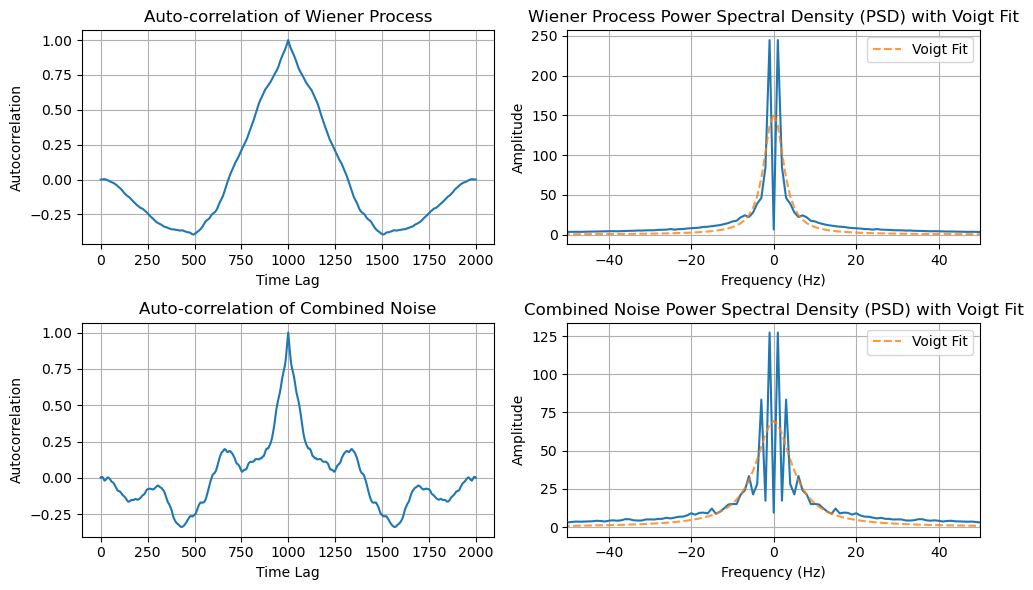

FWHM of the Wiener Process PSD (Voigt Fit): 4.733973806003103 Hz
FWHM of the Combined Noise PSD (Voigt Fit): 10.640005046521349 Hz


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import wofz

# Parameters for the Wiener process
sampling_rate = 1000  # Number of samples per second
total_time = 1.0      # Total time duration in seconds
num_samples = int(total_time * sampling_rate)

# Time step
dt = 1.0 / sampling_rate

# Generate Wiener process using cumulative sum of random normal samples
wiener_process = np.cumsum(np.sqrt(dt) * np.random.normal(size=num_samples))

# Auto-correlation of Wiener process
wiener_autocorrelation = np.correlate(wiener_process, wiener_process, mode='full')
wiener_autocorrelation /= np.max(wiener_autocorrelation)

# Compute the Fourier transform (Power Spectral Density) of the Wiener process from the middle to the end of the auto-correlation
middle_index = len(wiener_autocorrelation) // 2
wiener_auto_corr_second_half = wiener_autocorrelation[middle_index:]
wiener_psd = np.fft.fft(wiener_auto_corr_second_half)
wiener_frequency = np.fft.fftfreq(len(wiener_auto_corr_second_half), d=1.0 / sampling_rate)
wiener_psd = np.fft.fftshift(wiener_psd)
wiener_frequency = np.fft.fftshift(wiener_frequency)

# Define the Voigt function
def voigt(x, x0, sigma, gamma, amplitude):
    z = (x - x0 + 1j*gamma) / (sigma * np.sqrt(2))
    return amplitude * np.real(wofz(z)).real / (sigma * np.sqrt(2*np.pi))

# Fit the Wiener process PSD with Voigt
p0_voigt_wiener = [0, 1, 1, np.max(np.abs(wiener_psd))]   # Initial parameter estimates for Voigt fit
popt_voigt_wiener, _ = curve_fit(voigt, wiener_frequency, np.abs(wiener_psd), p0=p0_voigt_wiener)
fwhm_voigt_wiener = 2 * popt_voigt_wiener[2]

# Generate Pink noise
pink_noise = np.cumsum(np.random.normal(size=num_samples)) / np.sqrt(np.arange(1, num_samples + 1))

# Combine Wiener and Pink noise
combined_noise = wiener_process + pink_noise

# Auto-correlation of combined noise
combined_autocorrelation = np.correlate(combined_noise, combined_noise, mode='full')
combined_autocorrelation /= np.max(combined_autocorrelation)

# Compute the Fourier transform (Power Spectral Density) of the combined noise from the middle to the end of the auto-correlation
combined_auto_corr_second_half = combined_autocorrelation[middle_index:]
combined_psd = np.fft.fft(combined_auto_corr_second_half)
combined_frequency = np.fft.fftfreq(len(combined_auto_corr_second_half), d=1.0 / sampling_rate)
combined_psd = np.fft.fftshift(combined_psd)
combined_frequency = np.fft.fftshift(combined_frequency)

# Fit the combined noise PSD with Voigt
p0_voigt_combined = [0, 1, 1, np.max(np.abs(combined_psd))]   # Initial parameter estimates for Voigt fit
popt_voigt_combined, _ = curve_fit(voigt, combined_frequency, np.abs(combined_psd), p0=p0_voigt_combined)
fwhm_voigt_combined = 2 * popt_voigt_combined[2]

# Plot the auto-correlation and the PSD for Wiener process and the combined noise
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.plot(wiener_autocorrelation)
plt.title("Auto-correlation of Wiener Process")
plt.xlabel("Time Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)

plt.subplot(222)
plt.plot(wiener_frequency, np.abs(wiener_psd))
plt.title("Wiener Process Power Spectral Density (PSD) with Voigt Fit")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(-50, 50)
plt.plot(wiener_frequency, voigt(wiener_frequency, *popt_voigt_wiener), '--', label='Voigt Fit', alpha=0.8)
plt.legend()

plt.subplot(223)
plt.plot(combined_autocorrelation)
plt.title("Auto-correlation of Combined Noise")
plt.xlabel("Time Lag")
plt.ylabel("Autocorrelation")
plt.grid(True)

plt.subplot(224)
plt.plot(combined_frequency, np.abs(combined_psd))
plt.title("Combined Noise Power Spectral Density (PSD) with Voigt Fit")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(-50, 50)
plt.plot(combined_frequency, voigt(combined_frequency, *popt_voigt_combined), '--', label='Voigt Fit', alpha=0.8)
plt.legend()

plt.tight_layout()
plt.show()

print("FWHM of the Wiener Process PSD (Voigt Fit):", fwhm_voigt_wiener, "Hz")
print("FWHM of the Combined Noise PSD (Voigt Fit):", fwhm_voigt_combined, "Hz")
#pink noise + weiner noise combined gives voigt psd.
#for Wiener process alone - voigt is not correct fit.

In [ ]:
#pink noise captures the thermal noise sources in the experiment.
#Wiener process models the phase noise of laser which gives Lorentzian psd.